In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('dark')

In [2]:
titanic_df = pd.read_csv(".\Titanic_Dataset.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
missing_n = titanic_df.isna().sum()[titanic_df.isna().sum().apply(lambda count: count > 0)]
    
missing_values = pd.DataFrame({
    'amount': missing_n,
})
    
missing_values

,amount
Age,177
Cabin,687
Embarked,2


In [23]:
numerical_features = titanic_df.select_dtypes(include=['int64', 'float64'])
numerical_features.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [11]:
numerical_features.columns

Index(['Age', 'Fare'], dtype='object')

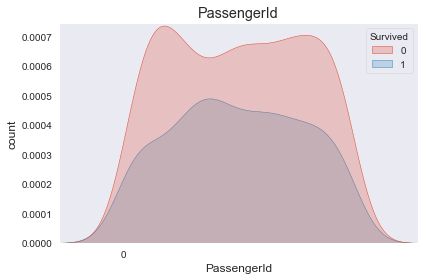

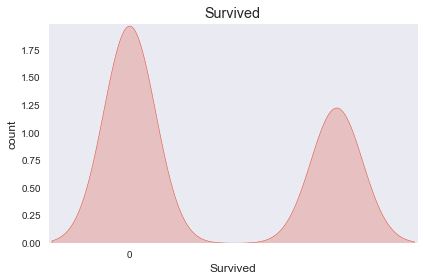

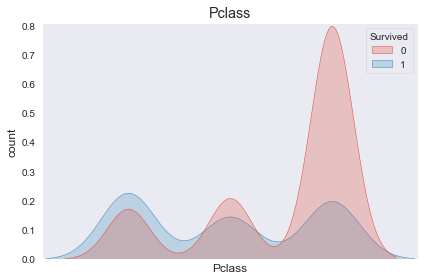

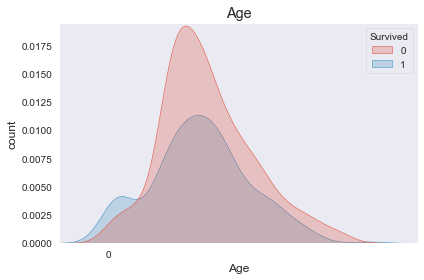

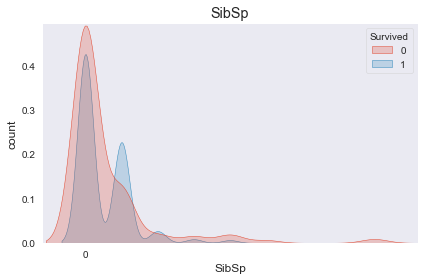

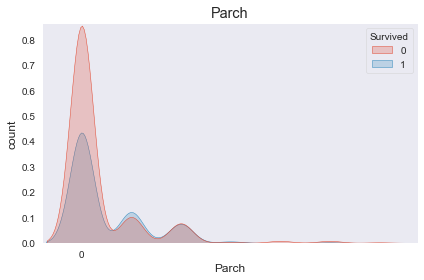

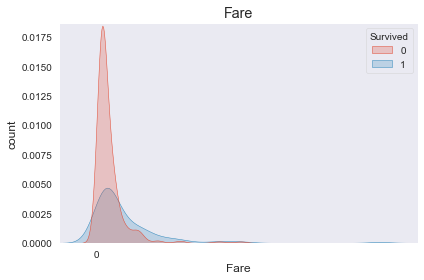

In [24]:
for numerical_feature in numerical_features:
    sns.kdeplot(x=numerical_feature,
    hue='Survived' if numerical_feature != 'Survived' else None,
    data=titanic_df, shade=True)
    sns.countplot()
    plt.title(numerical_feature)
    plt.margins(x=0.01, y=0.01)
    plt.tight_layout()
    plt.show()

In [26]:
categorical_variable = titanic_df.select_dtypes(include=['object'])
categorical_variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


In [29]:
n_unique_vars = titanic_df[categorical_variable.keys()].nunique()
n_unique_vars

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

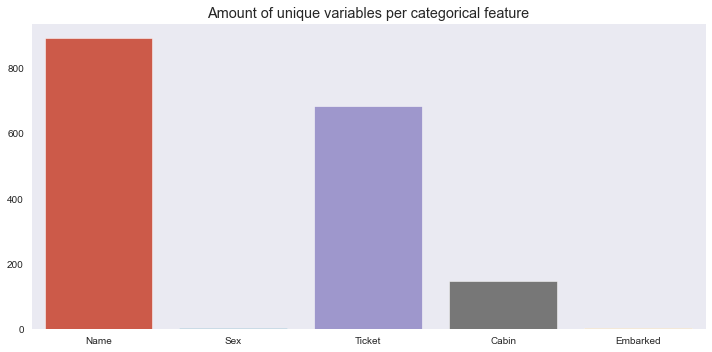

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x=n_unique_vars.keys(), y=n_unique_vars.values)
plt.title("Amount of unique variables per categorical feature")
plt.tight_layout()
plt.show()

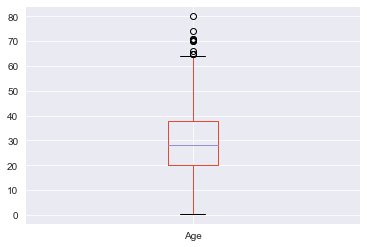

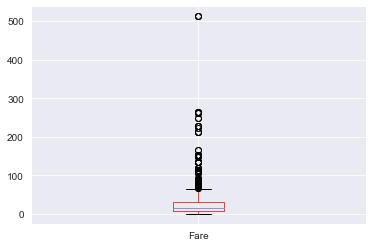

In [38]:
numerical_df = titanic_df.select_dtypes(include=['float64'])
for feature in numerical_df:  
    numerical_df.boxplot(column=feature)
    plt.show()

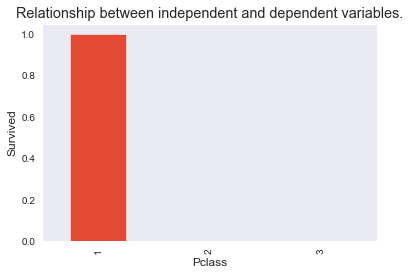

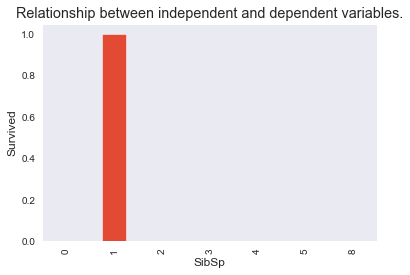

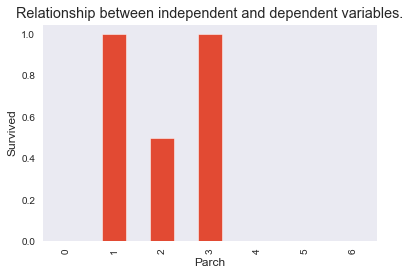

In [43]:
dis_var = titanic_df.select_dtypes(include=['int64'])
for features in dis_var:
    if features != 'PassengerId' and features !="Survived":        
        dis_var.groupby(features)['Survived'].median().plot.bar()
        plt.xlabel(features)
        plt.ylabel("Survived")
        plt.title("Relationship between independent and dependent variables.")
        plt.show()